In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [129]:
df = pd.read_csv("../data/adult.csv", index_col=0)
df_cleaned = df.replace("?", pd.NA).dropna()
df_cleaned["salary K$"] = pd.to_numeric(df_cleaned["salary K$"], errors="coerce")

df_cleaned.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,39
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,35
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,27
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,43
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,25


# Task 1
Print the count of men and women in the dataset.

In [130]:
count_male = (df_cleaned["sex"] == "Male").sum()
print(f"Males: {count_male}")

count_female = (df_cleaned["sex"] == "Female").sum()
print(f"Females: {count_female}")

Males: 20380
Females: 9782


# Task 2
Find the average age of men in dataset

In [131]:
avg_age_men = df_cleaned["age"].where(df_cleaned["sex"] == "Male").mean()
avg_age_men

np.float64(39.18400392541707)

# Task 3
Get the percentage of people from Poland (native-country)

In [132]:
pol_nat_country = ((df_cleaned["native-country"] == "Poland").sum() * 100) / df_cleaned["native-country"].count()
pol_nat_country

np.float64(0.18566408063125786)

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [133]:
std_greater_50 = df_cleaned["age"].where(df_cleaned["salary"] == ">50K").std()
std_less_or_equ_50 = df_cleaned["age"].where(df_cleaned["salary"] == "<=50K").std()

mean_greater_50 = df_cleaned["age"].where(df_cleaned["salary"] == ">50K").mean()
mean_less_or_equ_50 = df_cleaned["age"].where(df_cleaned["salary"] == "<=50K").mean()

print(f">50K - std: {std_greater_50} mean: {mean_greater_50}")
print(f"<=50K - std: {std_less_or_equ_50} mean: {mean_less_or_equ_50}")

>50K - std: 10.269632835673853 mean: 43.95911028236548
<=50K - std: 13.464631257161635 mean: 36.60806038668668


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [142]:
without_edu = ~df_cleaned["education"].isin(["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"])
high_salary = df_cleaned["salary"] == ">50K"
people_without_edu_high_salary = df_cleaned[without_edu & high_salary]
people_without_edu_high_salary

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$,sex_num
7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K,307,1
10,37,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,>50K,116,1
55,43,Private,Some-college,Married-civ-spouse,Tech-support,Husband,White,Male,40,United-States,>50K,341,1
67,53,Private,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,Female,40,United-States,>50K,225,0
68,49,Self-emp-inc,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50K,194,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32462,48,Self-emp-inc,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,50,United-States,>50K,343,1
32518,57,Local-gov,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,>50K,116,1
32519,46,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,48,United-States,>50K,239,1
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173,1


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [135]:
stat = df_cleaned.groupby("education")["age"].describe()
stat

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,820.0,37.897561,16.225795,17.0,23.0,36.0,52.0,90.0
11th,1048.0,32.363550,15.089307,17.0,18.0,28.5,43.0,90.0
12th,377.0,32.013263,14.373710,17.0,19.0,28.0,41.0,79.0
1st-4th,151.0,44.622517,14.929051,19.0,33.0,44.0,56.0,81.0
5th-6th,288.0,41.649306,14.754622,17.0,28.0,41.0,53.0,82.0
7th-8th,557.0,47.631957,15.737479,17.0,34.0,49.0,60.0,90.0
9th,455.0,40.303297,15.335754,17.0,28.0,38.0,53.0,90.0
Assoc-acdm,1008.0,37.286706,10.509755,19.0,29.0,36.0,44.0,90.0
Assoc-voc,1307.0,38.246366,11.181253,19.0,30.0,37.0,45.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [136]:
married = df_cleaned[(df_cleaned["marital-status"].str.split("-").str[0] == "Married") & (df_cleaned["salary"] == ">50K") & (df_cleaned["sex"] == "Male")].shape[0]

non_married = df_cleaned[(df_cleaned["marital-status"].str.split("-").str[0] != "Married") & (df_cleaned["salary"] == ">50K") & (df_cleaned["sex"] == "Male")].shape[0]
if married > non_married:
    print("more maried men with salary >50k")
else:
    print("more non-maried men with salary >50k")

more maried men with salary >50k


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [117]:
max_hours = max(df_cleaned["hours-per-week"])
max_hours_moda = df_cleaned["hours-per-week"].mode()[0]
count_mode_hours = df_cleaned["hours-per-week"].value_counts()[max_hours_moda]
print(max_hours)
print(count_mode_hours)

99
14251


# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

                     age  hours-per-week  salary K$   sex_num
age             1.000000        0.101599   0.208203  0.081993
hours-per-week  0.101599        1.000000   0.196378  0.231268
salary K$       0.208203        0.196378   1.000000  0.182642
sex_num         0.081993        0.231268   0.182642  1.000000


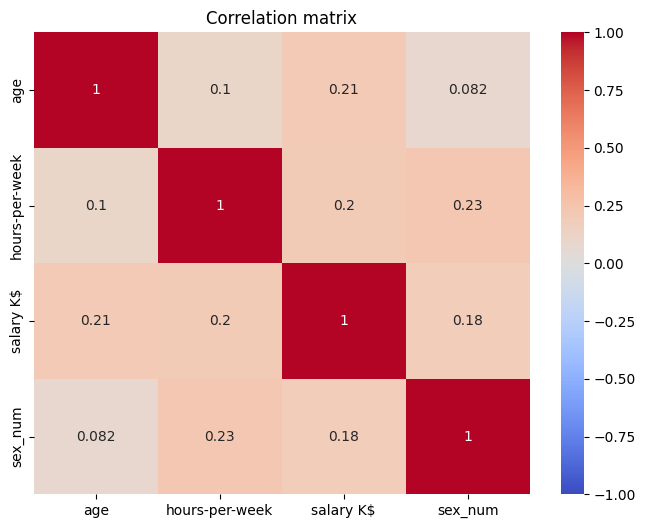

In [143]:
df_cleaned = df_cleaned.drop(columns=["Unnamed: 0"], errors='ignore')
df_cleaned["sex_num"] = df_cleaned["sex"].map({"Male": 1, "Female": 0})

data = df_cleaned.select_dtypes(include=["int64", "float64"])
res_corr = data.corr()
print(res_corr)

plt.figure(figsize=(8, 6))
sns.heatmap(res_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation matrix")
plt.show()
